In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the stock data into a pandas dataframe
df = pd.read_csv('TSLA.csv')

In [3]:
# Define a function to identify the Head and Shoulders pattern
def is_head_and_shoulders(row):
    # Check that the pattern exists
    if len(df) < 5 or row.name < 4:
        return False
    # Check that the pattern is a Head and Shoulders
    prev_high1 = df.loc[row.name - 4, 'High']
    prev_high2 = df.loc[row.name - 3, 'High']
    prev_high3 = df.loc[row.name - 2, 'High']
    curr_high = df.loc[row.name - 1, 'High']
    curr_low = row['Low']
    neck_line = np.mean([prev_high1, prev_high2, prev_high3])
    if (prev_high1 < prev_high2) and (prev_high2 > prev_high3) and (curr_high < prev_high1) and (curr_high < prev_high3) and (curr_low < neck_line):
        return True
    else:
        return False

# Identify the Head and Shoulders patterns in the data
head_and_shoulders_mask = df.apply(is_head_and_shoulders, axis=1)
head_and_shoulders_dates = df[head_and_shoulders_mask]['Date']

In [4]:
# Print out the dates of the patterns
print('Dates of Head and Shoulders patterns:')
for date in head_and_shoulders_dates:
    print(date)

Dates of Head and Shoulders patterns:
2022-05-09
2022-06-07
2022-06-14
2022-06-21
2022-06-30
2022-07-13
2022-07-27
2022-08-19
2022-09-02
2022-09-26
2022-10-03
2022-10-07
2022-10-21
2022-11-04
2022-11-09
2022-11-18
2022-12-06
2022-12-14
2022-12-21
2023-01-05
2023-02-14
2023-03-03
2023-03-27
2023-04-17
2023-04-20


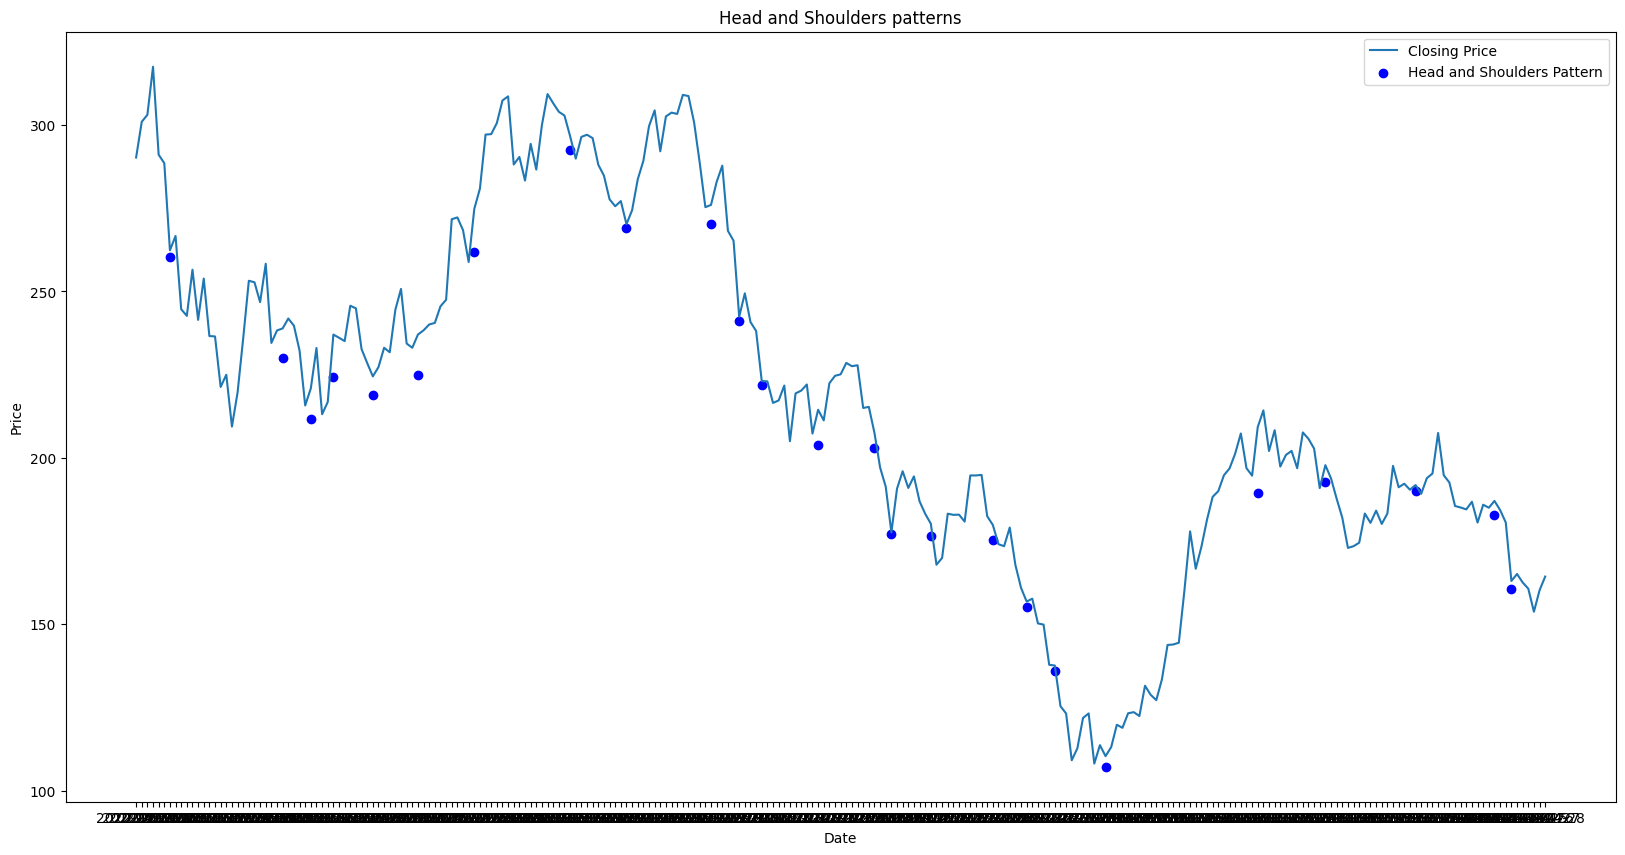

In [5]:
# Plot the stock data with the patterns highlighted
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['Date'], df['Close'], label='Closing Price')
ax.scatter(head_and_shoulders_dates, df[head_and_shoulders_mask]['Low'], color='b', label='Head and Shoulders Pattern')
ax.set_title('Head and Shoulders patterns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()